# Final Project Intro To Data Science

## Shilo Sharabi
## Yossi Shaul

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

### Read CSV file and encoding

In [2]:
DataFrame = pd.read_csv("DataSet.csv")


In [3]:
DataFrame

,Unnamed: 0,חדרים,קומה,"מ""ר",מצב הנכס,קומות בבנין,מרפסות,חניות,סוג נכס,שכונה,...,מטבח כשר,דוד שמש,גישה לנכים,"ממ""ד",משופצת,מחסן,מזגן תדיראן,ריהוט,גמיש,מחיר
0,0,5,8,128.0,משופץ,9.0,2.0,2,דירה,קרית השרון,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"3,250,000 ₪"
1,1,5,20,132.0,חדש,28.0,1.0,2,דירה,אגמים,...,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"3,950,000 ₪"
2,2,5,1,140.0,משופץ,14.0,1.0,2,דירה,קרית השרון,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,"3,390,000 ₪"
3,3,3,קרקע,90.0,במצב שמור,3.0,1.0,1,דירת גן,קרית נורדאו,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,"1,950,000 ₪"
4,4,5,6,370.0,משופץ,7.0,3.0,2,גג/פנטהאוז,נאות הרצל,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,"3,200,000 ₪"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,4251,4.5,9,130.0,משופץ,12.0,NaN,1,דירה,נתניה,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,"3,300,000 ₪"
4252,4252,6,9,152.0,במצב שמור,9.0,1.0,1,גג/פנטהאוז,רמת פולג,...,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"3,600,000 ₪"
4253,4253,8,קרקע,272.0,חדש,4.0,NaN,2,דירת גן,רמת אפרים,...,NaN,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,"4,490,000 ₪"
4254,4254,3,6,70.0,במצב שמור,6.0,NaN,ללא,דירה,נאות גנים,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"1,430,000 ₪"


In [4]:
columnsNames = {"מחיר":"Price",'מ"ר':"SM","קומה":"Floor","חדרים":"Rooms","תיווך":"Through Agent","שכונה":"Region","עיר":"City","סוג נכס":"Type"
               ,"מצב הנכס":"Status","קומות בבנין":"Total Floors","מרפסות":"Balconies","חניות":"Parking","סורגים":"Bars","מחסן":"Storage Room","מעלית":"Lift",
               "מיזוג": "Air Conditioner","גישה לנכים":"Accessibility","ריהוט":"Furniture","מזגן תדיראן":"Tadiran AC",'ממ"ד':"Mamad",
               "משופצת":"Renovated","מטבח כשר":"Kosher Kitchen", "דוד שמש": "Boiler", "גמיש": "Flexible"}

### Rename columns to english

In [5]:
DataFrame=DataFrame.rename(columns=columnsNames)

In [6]:
DataFrame

,Unnamed: 0,Rooms,Floor,SM,Status,Total Floors,Balconies,Parking,Type,Region,...,Kosher Kitchen,Boiler,Accessibility,Mamad,Renovated,Storage Room,Tadiran AC,Furniture,Flexible,Price
0,0,5,8,128.0,משופץ,9.0,2.0,2,דירה,קרית השרון,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"3,250,000 ₪"
1,1,5,20,132.0,חדש,28.0,1.0,2,דירה,אגמים,...,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"3,950,000 ₪"
2,2,5,1,140.0,משופץ,14.0,1.0,2,דירה,קרית השרון,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,"3,390,000 ₪"
3,3,3,קרקע,90.0,במצב שמור,3.0,1.0,1,דירת גן,קרית נורדאו,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,"1,950,000 ₪"
4,4,5,6,370.0,משופץ,7.0,3.0,2,גג/פנטהאוז,נאות הרצל,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,"3,200,000 ₪"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,4251,4.5,9,130.0,משופץ,12.0,NaN,1,דירה,נתניה,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,"3,300,000 ₪"
4252,4252,6,9,152.0,במצב שמור,9.0,1.0,1,גג/פנטהאוז,רמת פולג,...,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"3,600,000 ₪"
4253,4253,8,קרקע,272.0,חדש,4.0,NaN,2,דירת גן,רמת אפרים,...,NaN,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,"4,490,000 ₪"
4254,4254,3,6,70.0,במצב שמור,6.0,NaN,ללא,דירה,נאות גנים,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"1,430,000 ₪"


## Data processing

### Handling binary columns and category columns

In [7]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4256 non-null   int64  
 1   Rooms            4162 non-null   object 
 2   Floor            4162 non-null   object 
 3   SM               4162 non-null   float64
 4   Status           4122 non-null   object 
 5   Total Floors     3613 non-null   float64
 6   Balconies        2934 non-null   float64
 7   Parking          4122 non-null   object 
 8   Type             4158 non-null   object 
 9   Region           4132 non-null   object 
 10  City             4158 non-null   object 
 11  Through Agent    3579 non-null   float64
 12  Air Conditioner  4123 non-null   float64
 13  Bars             4123 non-null   float64
 14  Lift             4123 non-null   float64
 15  Kosher Kitchen   544 non-null    float64
 16  Boiler           4123 non-null   float64
 17  Accessibility 

In [8]:
binaryColumns =[]
notBinaryColumns=[]
for i in DataFrame.columns:
    values=DataFrame[i].value_counts()
    if(len(values)>2):
        notBinaryColumns.append(i)
    else:
        binaryColumns.append(i)

In [9]:
binaryColumns

['City',
 'Through Agent',
 'Air Conditioner',
 'Bars',
 'Lift',
 'Kosher Kitchen',
 'Boiler',
 'Accessibility',
 'Mamad',
 'Renovated',
 'Storage Room',
 'Tadiran AC',
 'Furniture',
 'Flexible']

In [10]:
notBinaryColumns

['Unnamed: 0',
 'Rooms',
 'Floor',
 'SM',
 'Status',
 'Total Floors',
 'Balconies',
 'Parking',
 'Type',
 'Region',
 'Price']

In [11]:
print("------------------------------------------")
for i in binaryColumns:
    print(DataFrame[i].value_counts())
    print("------------------------------------------")
    

------------------------------------------
 נתניה    4132
נתניה       26
Name: City, dtype: int64
------------------------------------------
0.0    3142
1.0     437
Name: Through Agent, dtype: int64
------------------------------------------
1.0    3775
0.0     348
Name: Air Conditioner, dtype: int64
------------------------------------------
0.0    2888
1.0    1235
Name: Bars, dtype: int64
------------------------------------------
1.0    2935
0.0    1188
Name: Lift, dtype: int64
------------------------------------------
0.0    418
1.0    126
Name: Kosher Kitchen, dtype: int64
------------------------------------------
1.0    2340
0.0    1783
Name: Boiler, dtype: int64
------------------------------------------
1.0    2628
0.0    1496
Name: Accessibility, dtype: int64
------------------------------------------
1.0    2512
0.0    1612
Name: Mamad, dtype: int64
------------------------------------------
1.0    2549
0.0    1575
Name: Renovated, dtype: int64
-----------------------------

In [12]:
DataFrame.drop('City', inplace=True, axis=1)
binaryColumns.remove('City')

In [13]:
print("------------------------------------------")
for i in notBinaryColumns:
    print(DataFrame[i].value_counts())
    print("------------------------------------------")

------------------------------------------
0       1
1350    1
1322    1
3371    1
1326    1
       ..
2688    1
641     1
2692    1
645     1
2047    1
Name: Unnamed: 0, Length: 4256, dtype: int64
------------------------------------------
5      1414
4      1203
3       509
6       323
4.5     147
3.5     133
7       131
5.5      78
8        75
2.5      51
2        26
9        26
6.5      16
10       13
12        7
7.5       4
1.5       3
-         2
1         1
Name: Rooms, dtype: int64
------------------------------------------
קרקע    690
1       559
2       465
4       391
3       341
5       272
6       227
9       134
8       133
7       119
13      102
10       91
12       87
11       73
14       63
15       61
16       60
17       53
20       43
21       39
18       35
24       29
19       22
27       17
32       16
23       12
22        8
-1        5
30        5
25        4
29        4
28        1
26        1
Name: Floor, dtype: int64
----------------------------------------

In [14]:
DataFrame.drop('Unnamed: 0', inplace=True, axis=1)
notBinaryColumns.remove('Unnamed: 0')

### Handling records without values in binary columns

In [15]:
for binaryColumn in binaryColumns:
    DataFrame.loc[:,binaryColumn].replace(np.nan, 0.0, inplace=True)

In [16]:
notBinaryColumns

['Rooms',
 'Floor',
 'SM',
 'Status',
 'Total Floors',
 'Balconies',
 'Parking',
 'Type',
 'Region',
 'Price']

In [17]:
def makeItCategorial(column):
    numOfOptions=0
    newRow={}
    for row in DataFrame[column]:
        if row is np.nan:
            continue
        if  newRow.get(row)==None:
            newRow[row]=numOfOptions
            numOfOptions+=1
    return newRow

dictonary=[]

def replaceStringsToNumbers (column):
    numbersList = makeItCategorial(column)
    dictonary.append(numbersList)
    print("-----------------------------------------------------")
    print(numbersList)
    DataFrame[column].replace(numbersList,inplace=True)
    


### Cleaning wrong data

In [18]:
rowsToDelete=[]
for i in range (len(DataFrame.index)):
    if DataFrame["SM"][i]=="לא צוין":
        rowsToDelete.append(i)
    else:
        if DataFrame["Rooms"][i]=="-" or DataFrame["Rooms"][i]==np.nan:
            rowsToDelete.append(i)
                    
DataFrame.drop(DataFrame.index[rowsToDelete],axis=0,inplace=True)
DataFrame.reset_index(inplace=True)
del DataFrame["index"]



### Handling records without values in category columns

In [19]:
DataFrame.loc[:, "Parking"].replace("ללא",0, inplace=True)
DataFrame.loc[:, "Balconies"].replace(np.nan,0, inplace=True)
DataFrame.loc[:, "Total Floors"].replace(np.nan,0, inplace=True)
DataFrame.loc[:, "Floor"].replace("קרקע",0, inplace=True)
replaceStringsToNumbers("Status")
replaceStringsToNumbers("Type")
DataFrame.loc[:,"Price"].replace("לא צוין מחיר",np.nan,inplace=True)
DataFrame.loc[:,"Region"].replace("[]",np.nan,inplace=True)
replaceStringsToNumbers("Region")
DataFrame.loc[:,"Rooms"].replace("-",np.nan,inplace=True)



-----------------------------------------------------
{'משופץ': 0, 'חדש': 1, 'במצב שמור': 2, 'דרוש שיפוץ': 3, 'חדש מקבלן': 4}
-----------------------------------------------------
{'דירה': 0, 'דירת גן': 1, 'גג/פנטהאוז': 2, "בית פרטי/קוטג'": 3, 'דו משפחתי ': 4, 'דו משפחתי': 5, 'טריפלקס': 6, 'דופלקס': 7, 'דופלקס ': 8, 'יחידת דיור': 9, 'דירה ': 10, 'מרתף/פרטר': 11, "בית פרטי/קוטג' ": 12, 'דירת גן ': 13}
-----------------------------------------------------
{' קרית השרון': 0, ' אגמים': 1, ' קרית נורדאו': 2, ' נאות הרצל': 3, ' רמת חן ובן ציון': 4, ' עיר ימים': 5, ' רמת פולג': 6, ' צפון מזרח מרכז העיר': 7, ' מרכז העיר דרום': 8, ' גבעת האירוסים': 9, ' נוף הטיילת': 10, ' צפון מערב מרכז העיר': 11, ' קרית רבין': 12, ' רמת אפרים': 13, ' נתניה': 14, ' גלי הים': 15, ' רמת ידין': 16, ' משכנות זבולון': 17, ' נאות שקד': 18, ' קרית צאנז': 19, ' נאות גנים': 20, ' פרדס הגדוד': 21, ' נוף השרון': 22, ' נווה איתמר': 23, ' כוכב הצפון': 24, ' כוכב הים': 25, ' עין התכלת': 26}


In [20]:
rowsWithoutPrice=[]
for i in range(len(DataFrame["Price"])):
    if DataFrame["Price"][i] is not np.nan:
        DataFrame.loc[i,["Price"]]= float(str(DataFrame["Price"][i]).split(" ")[0].replace(",",""))
    else :
        rowsWithoutPrice.append(i)
DataFrame.drop(DataFrame.index[rowsWithoutPrice],axis=0,inplace=True)
DataFrame.reset_index(inplace=True)
del DataFrame["index"]

In [21]:
DataFrame=DataFrame.astype(float)

In [22]:
DataFrame

,Rooms,Floor,SM,Status,Total Floors,Balconies,Parking,Type,Region,Through Agent,...,Kosher Kitchen,Boiler,Accessibility,Mamad,Renovated,Storage Room,Tadiran AC,Furniture,Flexible,Price
0,5.0,8.0,128.0,0.0,9.0,2.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3250000.0
1,5.0,20.0,132.0,1.0,28.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3950000.0
2,5.0,1.0,140.0,0.0,14.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3390000.0
3,3.0,0.0,90.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1950000.0
4,5.0,6.0,370.0,0.0,7.0,3.0,2.0,2.0,3.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,4.5,9.0,130.0,0.0,12.0,0.0,1.0,0.0,14.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3300000.0
4000,6.0,9.0,152.0,2.0,9.0,1.0,1.0,2.0,6.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3600000.0
4001,8.0,0.0,272.0,1.0,4.0,0.0,2.0,1.0,13.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4490000.0
4002,3.0,6.0,70.0,2.0,6.0,0.0,0.0,0.0,20.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1430000.0


In [23]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rooms            4004 non-null   float64
 1   Floor            4004 non-null   float64
 2   SM               4004 non-null   float64
 3   Status           3895 non-null   float64
 4   Total Floors     4004 non-null   float64
 5   Balconies        4004 non-null   float64
 6   Parking          3895 non-null   float64
 7   Type             4000 non-null   float64
 8   Region           3974 non-null   float64
 9   Through Agent    4004 non-null   float64
 10  Air Conditioner  4004 non-null   float64
 11  Bars             4004 non-null   float64
 12  Lift             4004 non-null   float64
 13  Kosher Kitchen   4004 non-null   float64
 14  Boiler           4004 non-null   float64
 15  Accessibility    4004 non-null   float64
 16  Mamad            4004 non-null   float64
 17  Renovated     

### Drop duplicates

In [24]:
DataFrame.drop_duplicates()

,Rooms,Floor,SM,Status,Total Floors,Balconies,Parking,Type,Region,Through Agent,...,Kosher Kitchen,Boiler,Accessibility,Mamad,Renovated,Storage Room,Tadiran AC,Furniture,Flexible,Price
0,5.0,8.0,128.0,0.0,9.0,2.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3250000.0
1,5.0,20.0,132.0,1.0,28.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3950000.0
2,5.0,1.0,140.0,0.0,14.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3390000.0
3,3.0,0.0,90.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1950000.0
4,5.0,6.0,370.0,0.0,7.0,3.0,2.0,2.0,3.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,4.0,2.0,110.0,1.0,3.0,1.0,2.0,0.0,14.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2590000.0
3925,4.0,5.0,116.0,1.0,9.0,1.0,1.0,0.0,14.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2890000.0
3958,5.0,3.0,130.0,0.0,8.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3215000.0
3971,4.0,1.0,124.0,1.0,25.0,1.0,2.0,0.0,5.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3990000.0


In [25]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rooms            4004 non-null   float64
 1   Floor            4004 non-null   float64
 2   SM               4004 non-null   float64
 3   Status           3895 non-null   float64
 4   Total Floors     4004 non-null   float64
 5   Balconies        4004 non-null   float64
 6   Parking          3895 non-null   float64
 7   Type             4000 non-null   float64
 8   Region           3974 non-null   float64
 9   Through Agent    4004 non-null   float64
 10  Air Conditioner  4004 non-null   float64
 11  Bars             4004 non-null   float64
 12  Lift             4004 non-null   float64
 13  Kosher Kitchen   4004 non-null   float64
 14  Boiler           4004 non-null   float64
 15  Accessibility    4004 non-null   float64
 16  Mamad            4004 non-null   float64
 17  Renovated     

# EDA 

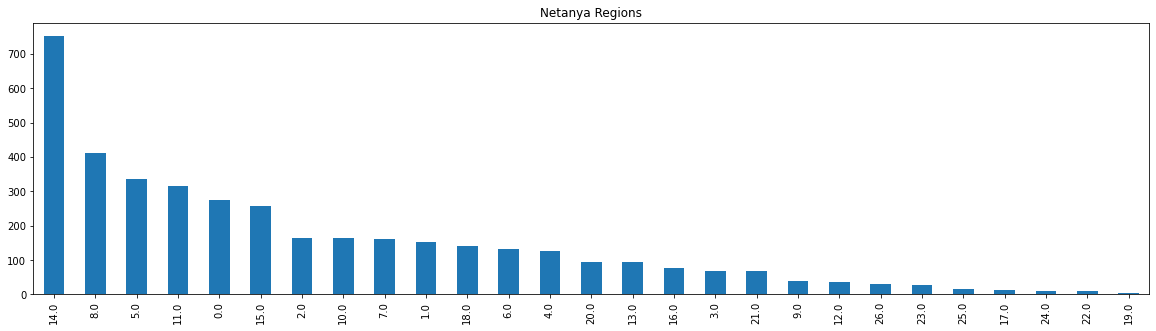

 קרית השרון 0
 אגמים 1
 קרית נורדאו 2
 נאות הרצל 3
 רמת חן ובן ציון 4
 עיר ימים 5
 רמת פולג 6
 צפון מזרח מרכז העיר 7
 מרכז העיר דרום 8
 גבעת האירוסים 9
 נוף הטיילת 10
 צפון מערב מרכז העיר 11
 קרית רבין 12
 רמת אפרים 13
 נתניה 14
 גלי הים 15
 רמת ידין 16
 משכנות זבולון 17
 נאות שקד 18
 קרית צאנז 19
 נאות גנים 20
 פרדס הגדוד 21
 נוף השרון 22
 נווה איתמר 23
 כוכב הצפון 24
 כוכב הים 25
 עין התכלת 26


In [26]:
plt.figure(figsize=(20,5))
DataFrame["Region"].value_counts().plot(kind="bar")
plt.title("Netanya Regions")
plt.show()
for key in dictonary[2]:
    print(key,dictonary[2][key])


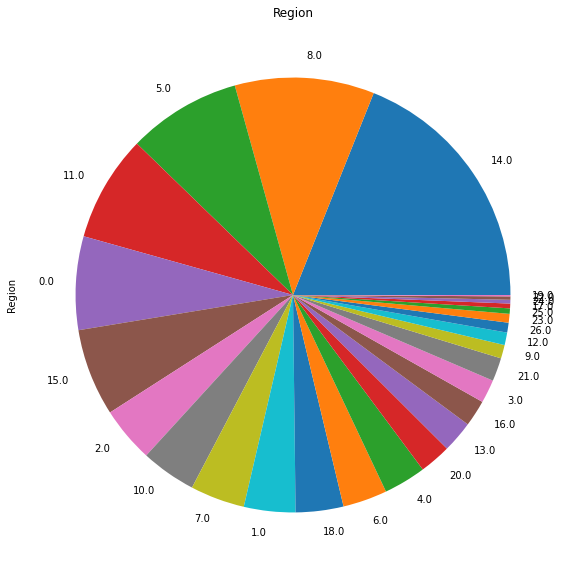

 קרית השרון 0
 אגמים 1
 קרית נורדאו 2
 נאות הרצל 3
 רמת חן ובן ציון 4
 עיר ימים 5
 רמת פולג 6
 צפון מזרח מרכז העיר 7
 מרכז העיר דרום 8
 גבעת האירוסים 9
 נוף הטיילת 10
 צפון מערב מרכז העיר 11
 קרית רבין 12
 רמת אפרים 13
 נתניה 14
 גלי הים 15
 רמת ידין 16
 משכנות זבולון 17
 נאות שקד 18
 קרית צאנז 19
 נאות גנים 20
 פרדס הגדוד 21
 נוף השרון 22
 נווה איתמר 23
 כוכב הצפון 24
 כוכב הים 25
 עין התכלת 26


In [27]:

plt.figure(figsize=(20,10))
DataFrame["Region"].value_counts().plot(kind="pie")
plt.title("Region")
plt.show()
for key in dictonary[2]:
    print(key,dictonary[2][key])

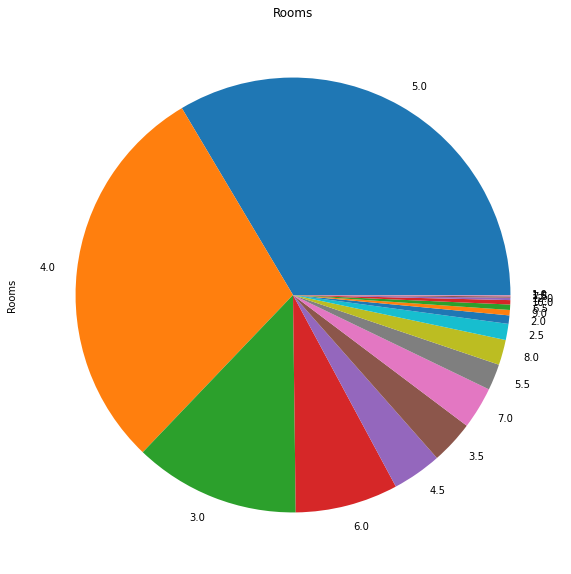

In [28]:
plt.figure(figsize=(20,10))
DataFrame["Rooms"].value_counts().plot(kind="pie")
plt.title("Rooms")
plt.show()

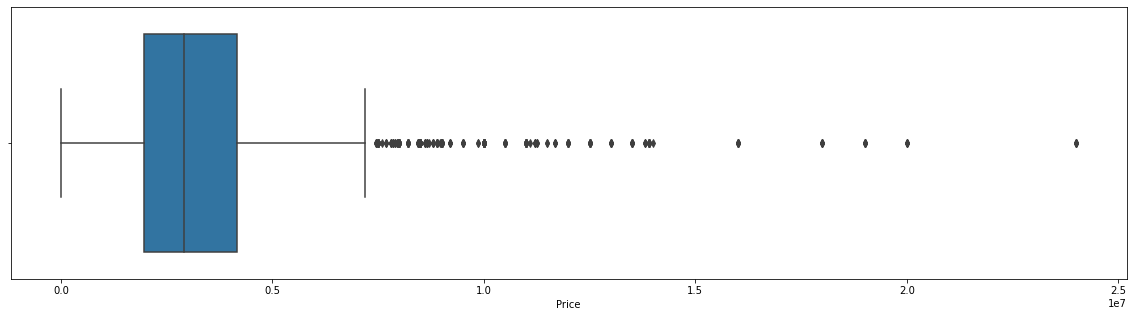

sum off outliers : 86
min of outliers in Price column : 11200000.0


,Rooms,Floor,SM,Status,Total Floors,Balconies,Parking,Type,Region,Through Agent,...,Kosher Kitchen,Boiler,Accessibility,Mamad,Renovated,Storage Room,Tadiran AC,Furniture,Flexible,Price
31,8.0,22.0,284.0,4.0,24.0,3.0,2.0,6.0,14.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13800000.0
64,8.0,22.0,284.0,4.0,24.0,3.0,2.0,6.0,14.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13800000.0
152,5.0,0.0,270.0,4.0,0.0,2.0,1.0,7.0,10.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12000000.0
176,6.0,14.0,227.0,0.0,18.0,1.0,3.0,0.0,5.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11690000.0
191,6.0,10.0,280.0,0.0,13.0,2.0,3.0,2.0,8.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,13900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,6.0,10.0,280.0,0.0,13.0,2.0,3.0,2.0,8.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,13900000.0
3462,8.0,0.0,400.0,2.0,0.0,0.0,0.0,3.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11250000.0
3467,5.0,19.0,200.0,1.0,19.0,2.0,2.0,2.0,14.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,12000000.0
3916,6.0,14.0,227.0,0.0,18.0,1.0,3.0,0.0,5.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11690000.0


In [29]:
plt.figure(figsize=(20,5))
sns.boxplot(DataFrame.Price)
plt.show()
z_score = (DataFrame["Price"] - DataFrame["Price"].mean()) / DataFrame["Price"].std()
outliers = abs(z_score) > 3
print("sum off outliers : "+str(sum(outliers)))
print("min of outliers in Price column : "+ str(min(DataFrame.Price[outliers])))
DataFrame[DataFrame["Price"]>min(DataFrame.Price[outliers])]

### Outliers

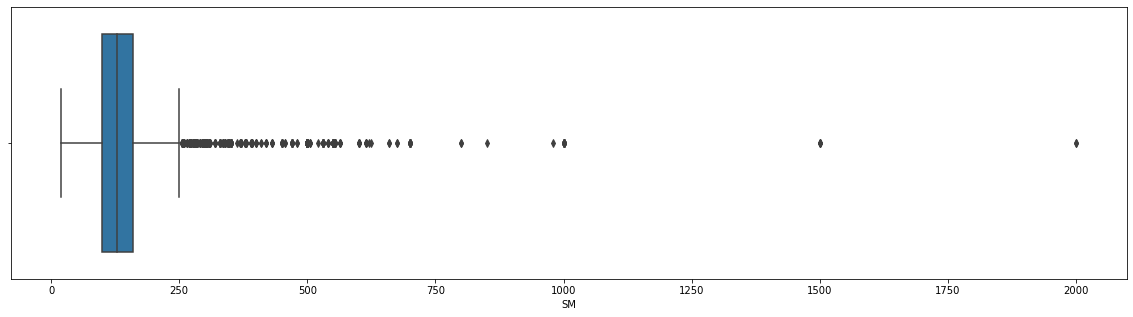

sum off outliers : 87
min of outliers in Square Meter column : 540.0


,Rooms,Floor,SM,Status,Total Floors,Balconies,Parking,Type,Region,Through Agent,...,Kosher Kitchen,Boiler,Accessibility,Mamad,Renovated,Storage Room,Tadiran AC,Furniture,Flexible,Price
19,6.0,0.0,554.0,0.0,0.0,3.0,3.0,4.0,NaN,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8490000.0
101,6.0,0.0,554.0,0.0,0.0,3.0,3.0,5.0,10.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8490000.0
103,7.0,0.0,600.0,3.0,0.0,0.0,3.0,3.0,20.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3700000.0
170,10.0,0.0,850.0,0.0,0.0,1.0,0.0,3.0,23.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7980000.0
234,6.0,10.0,564.0,1.0,10.0,3.0,2.0,2.0,15.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,11200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,6.0,10.0,564.0,1.0,10.0,3.0,2.0,2.0,15.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,11200000.0
3844,6.0,0.0,554.0,0.0,0.0,3.0,3.0,5.0,10.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8490000.0
3860,3.0,0.0,675.0,2.0,0.0,2.0,1.0,3.0,20.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4350000.0
3881,7.0,0.0,600.0,3.0,0.0,0.0,3.0,3.0,20.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3700000.0


In [30]:
plt.figure(figsize=(20,5))
sns.boxplot(DataFrame.SM)
plt.show()
z_score = (DataFrame["SM"] - DataFrame["SM"].mean()) / DataFrame["SM"].std()
outliers = abs(z_score) > 3
print("sum off outliers : "+str(sum(outliers)))
print("min of outliers in Square Meter column : "+ str(min(DataFrame.SM[outliers])))
DataFrame[DataFrame["SM"]>min(DataFrame.SM[outliers])]


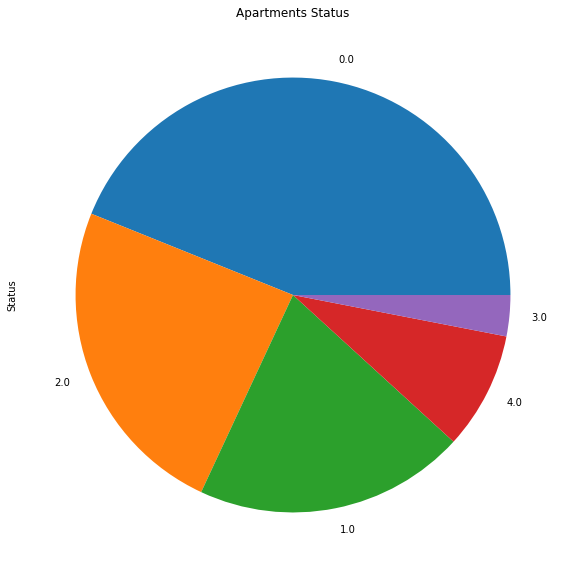

משופץ 0
חדש 1
במצב שמור 2
דרוש שיפוץ 3
חדש מקבלן 4


In [31]:
plt.figure(figsize=(20,10))
DataFrame["Status"].value_counts().plot(kind="pie")
plt.title("Apartments Status")
plt.show()
for key in dictonary[0]:
    print(key,dictonary[0][key])

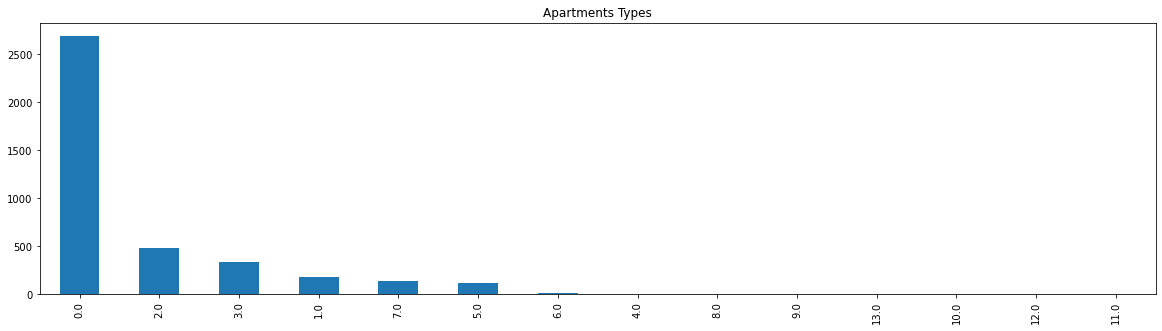

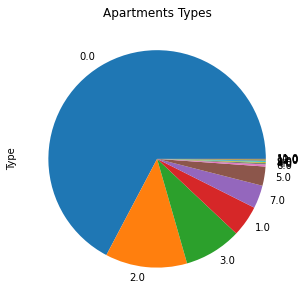

דירה 0
דירת גן 1
גג/פנטהאוז 2
בית פרטי/קוטג' 3
דו משפחתי  4
דו משפחתי 5
טריפלקס 6
דופלקס 7
דופלקס  8
יחידת דיור 9
דירה  10
מרתף/פרטר 11
בית פרטי/קוטג'  12
דירת גן  13


In [32]:
plt.figure(figsize=(20,5))
DataFrame["Type"].value_counts().plot(kind="bar")
plt.title("Apartments Types")
plt.show()

plt.figure(figsize=(20,5))
DataFrame["Type"].value_counts().plot(kind="pie")
plt.title("Apartments Types")
plt.show()
for key in dictonary[1]:
    print(key,dictonary[1][key])

In [33]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rooms            4004 non-null   float64
 1   Floor            4004 non-null   float64
 2   SM               4004 non-null   float64
 3   Status           3895 non-null   float64
 4   Total Floors     4004 non-null   float64
 5   Balconies        4004 non-null   float64
 6   Parking          3895 non-null   float64
 7   Type             4000 non-null   float64
 8   Region           3974 non-null   float64
 9   Through Agent    4004 non-null   float64
 10  Air Conditioner  4004 non-null   float64
 11  Bars             4004 non-null   float64
 12  Lift             4004 non-null   float64
 13  Kosher Kitchen   4004 non-null   float64
 14  Boiler           4004 non-null   float64
 15  Accessibility    4004 non-null   float64
 16  Mamad            4004 non-null   float64
 17  Renovated     

### Heat Map

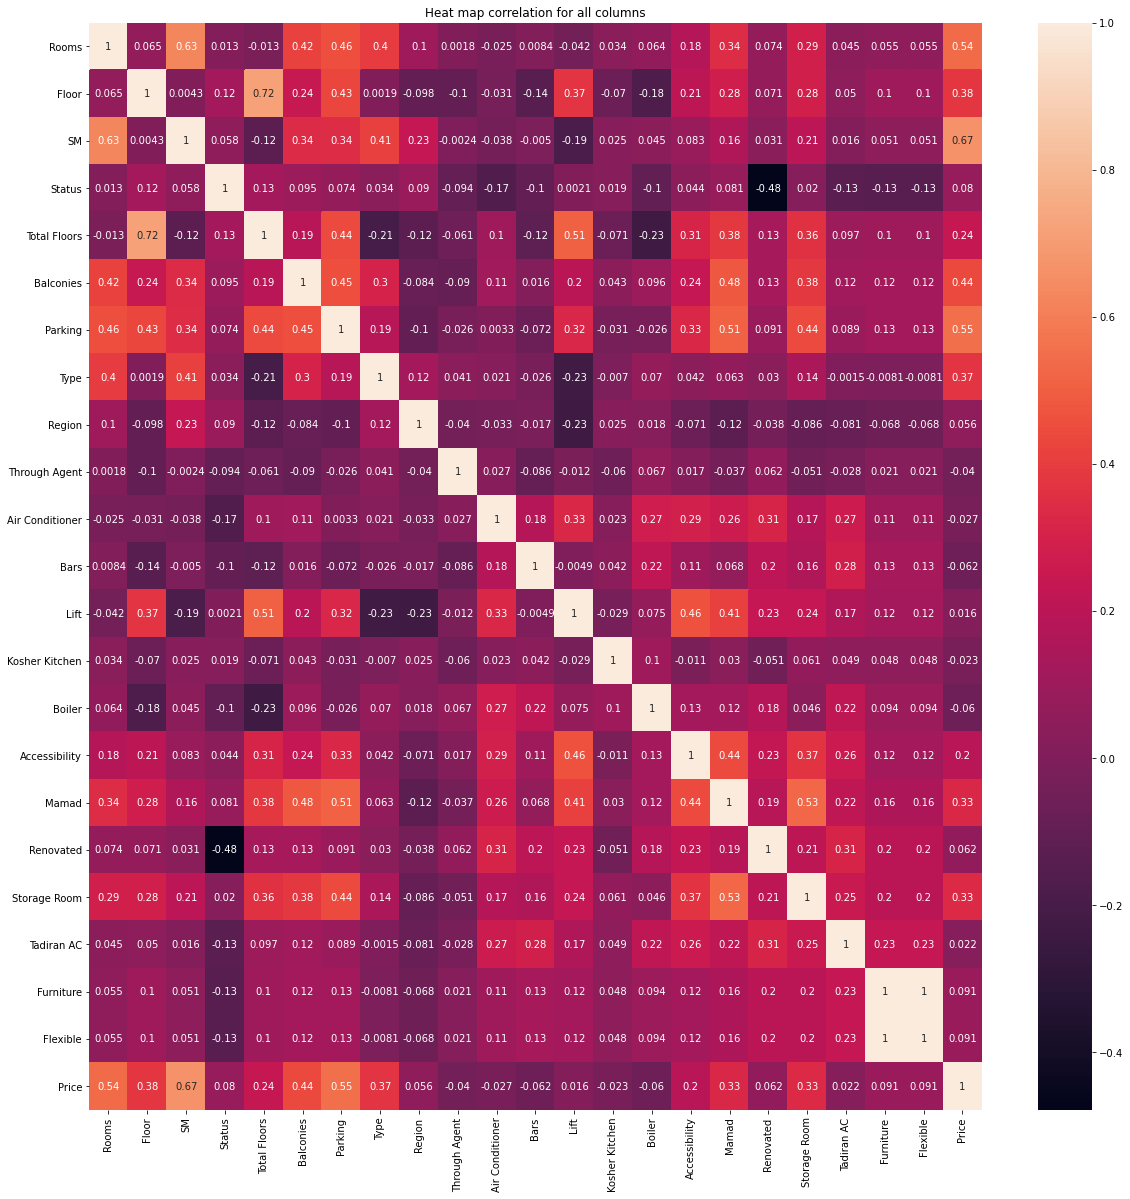

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(DataFrame.corr(), annot=True)
plt.title('Heat map correlation for all columns')
plt.show()

In [35]:
notBinaryColumns

['Rooms',
 'Floor',
 'SM',
 'Status',
 'Total Floors',
 'Balconies',
 'Parking',
 'Type',
 'Region',
 'Price']

In [36]:
binaryColumns

['Through Agent',
 'Air Conditioner',
 'Bars',
 'Lift',
 'Kosher Kitchen',
 'Boiler',
 'Accessibility',
 'Mamad',
 'Renovated',
 'Storage Room',
 'Tadiran AC',
 'Furniture',
 'Flexible']

### Add columns with maximum contact according to the heat map to make the model more accurate

In [37]:
def makeItOneColumn(columnsArray, newColName):
    DataFrame[newColName]=DataFrame[columnsArray[0]]
    for i in range(len(columnsArray)-1):
        DataFrame[newColName]+=DataFrame[columnsArray[i+1]]

In [38]:
extraAreas = ["Parking","Balconies","Storage Room"]
makeItOneColumn(extraAreas,"Extra Areas Score")


In [39]:
DataFrame["Rooms"].mean()

4.598776223776224

In [40]:
DataFrame["Total Rooms Score"] = DataFrame["Rooms"]
for i in range(len(DataFrame["Rooms"])):
    if DataFrame["Rooms"][i] >= 5 :
        DataFrame["Total Rooms Score"][i]=3
    else:
        if DataFrame["Rooms"][i] >3.5 and DataFrame["Rooms"][i]<5:
            DataFrame["Total Rooms Score"][i]=2
        else:
            if DataFrame["Rooms"][i]<=3.5 :
                DataFrame["Total Rooms Score"][i]=1

In [41]:
DataFrame["Total Rooms Score"].value_counts()

3.0    1983
2.0    1321
1.0     700
Name: Total Rooms Score, dtype: int64

### We will delete columns whose values are exceptional and null in order to improve the prediction

In [42]:
del DataFrame["Status"]
del DataFrame["Region"]
del DataFrame["Through Agent"]
del DataFrame["Kosher Kitchen"]
del DataFrame["Flexible"]
rowsToDelete=[]
for i in range(len(DataFrame["Price"])):
    if DataFrame["Price"][i]>6000000 or DataFrame["Price"][i]<800000:
        rowsToDelete.append(i)
    if DataFrame["SM"][i]<20 or DataFrame["SM"][i]>500:
        rowsToDelete.append(i)
DataFrame.drop(DataFrame.index[rowsToDelete],axis=0,inplace=True)
DataFrame.reset_index(inplace=True)
del DataFrame["index"]
DataFrame.dropna(axis=0, how='any', inplace=True)
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3552
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rooms              3450 non-null   float64
 1   Floor              3450 non-null   float64
 2   SM                 3450 non-null   float64
 3   Total Floors       3450 non-null   float64
 4   Balconies          3450 non-null   float64
 5   Parking            3450 non-null   float64
 6   Type               3450 non-null   float64
 7   Air Conditioner    3450 non-null   float64
 8   Bars               3450 non-null   float64
 9   Lift               3450 non-null   float64
 10  Boiler             3450 non-null   float64
 11  Accessibility      3450 non-null   float64
 12  Mamad              3450 non-null   float64
 13  Renovated          3450 non-null   float64
 14  Storage Room       3450 non-null   float64
 15  Tadiran AC         3450 non-null   float64
 16  Furniture          3450 

# Learning machine

### Division of the information into a training group and a test group

In [43]:
def prepareToTrainAndTest(dataFrame, label_column):
   

    trainingSet = dataFrame.columns[dataFrame.columns != str(label_column)]
    tragetColumn = str(label_column)
    X = dataFrame[trainingSet]
    y = dataFrame[tragetColumn]
    
    return X,y

In [44]:
X,y=prepareToTrainAndTest(DataFrame,"Price")
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3552
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rooms              3450 non-null   float64
 1   Floor              3450 non-null   float64
 2   SM                 3450 non-null   float64
 3   Total Floors       3450 non-null   float64
 4   Balconies          3450 non-null   float64
 5   Parking            3450 non-null   float64
 6   Type               3450 non-null   float64
 7   Air Conditioner    3450 non-null   float64
 8   Bars               3450 non-null   float64
 9   Lift               3450 non-null   float64
 10  Boiler             3450 non-null   float64
 11  Accessibility      3450 non-null   float64
 12  Mamad              3450 non-null   float64
 13  Renovated          3450 non-null   float64
 14  Storage Room       3450 non-null   float64
 15  Tadiran AC         3450 non-null   float64
 16  Furniture          3450 

### normalization

In [45]:
print(y)
print("Max y: ",y.max())
print("Min y: ",y.min())
scaler=StandardScaler()
X=scaler.fit_transform(X)

print("================================")

minimum = y.min()
maximum = y.max()
for i in y.index:
    y[i] = (y[i]-minimum)/(maximum - minimum)
print(y)
print("Max y: ",y.max())
print("Min y: ",y.min())

0       3250000.0
1       3950000.0
2       3390000.0
3       1950000.0
4       3200000.0
          ...    
3548    3300000.0
3549    3600000.0
3550    4490000.0
3551    1430000.0
3552    3180000.0
Name: Price, Length: 3450, dtype: float64
Max y:  6000000.0
Min y:  880000.0
0       0.462891
1       0.599609
2       0.490234
3       0.208984
4       0.453125
          ...   
3548    0.472656
3549    0.531250
3550    0.705078
3551    0.107422
3552    0.449219
Name: Price, Length: 3450, dtype: float64
Max y:  1.0
Min y:  0.0


# Linear Regression Algorithm

In [46]:

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
reg=LinearRegression()
reg.fit(xtrain,ytrain)
yPredict=reg.predict(xtest)
yScore = r2_score(ytest,yPredict)


In [47]:
def testAndPredictedTable(test,predict):
    testColumn={}
    testColumn["Test"] = test
    testColumn["Predicted"] = predict
    DF = pd.DataFrame(testColumn)
    DF.reset_index(inplace=True)
    del DF["index"]
    DF=DF.astype(float)
    return DF

R2 :  0.7097314121735421


        Test  Predicted
0   0.130859   0.172584
1   0.306641   0.329619
2   0.677734   0.651831
3   0.199219   0.265819
4   0.578125   0.562176
5   0.267578   0.280208
6   0.277344   0.115881
7   0.335938   0.304070
8   0.580078   0.548686
9   0.335938   0.295713
10  0.099609   0.128848
11  0.521484   0.611054
12  0.134766   0.221533
13  0.375000   0.274643
14  0.169922   0.123144
15  0.378906   0.622072
16  0.628906   0.575470
17  0.150391   0.123328
18  0.423828   0.505954
19  0.105469   0.140926
20  0.580078   0.559007
21  0.214844   0.264709
22  0.212891   0.227783
23  0.203125   0.248920
24  0.212891   0.269949


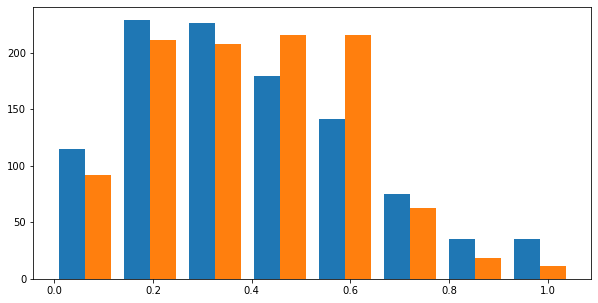

In [48]:
print("R2 : ",yScore)
print("\n")
tableA={}
tableA=testAndPredictedTable(ytest,yPredict)
print(tableA.head(25))
plt.figure(figsize=(10,5))
plt.hist(tableA,bins=8)
plt.show()

### Lasso Regression Algorithm

In [49]:
X,y=prepareToTrainAndTest(DataFrame,"Price")

scaler=StandardScaler()
X=scaler.fit_transform(X)

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
las=Lasso(alpha=0.004)
las.fit(xtrain,ytrain)
yPredict=las.predict(xtest)
yScore = r2_score(ytest,yPredict)


R2 :  0.7076351210253558


        Test  Predicted
0   0.130859   0.186403
1   0.306641   0.332407
2   0.677734   0.636854
3   0.199219   0.272274
4   0.578125   0.556972
5   0.267578   0.302800
6   0.277344   0.114518
7   0.335938   0.306026
8   0.580078   0.524381
9   0.335938   0.309062
10  0.099609   0.118041
11  0.521484   0.597013
12  0.134766   0.238693
13  0.375000   0.256150
14  0.169922   0.128207
15  0.378906   0.614953
16  0.628906   0.574769
17  0.150391   0.121930
18  0.423828   0.503660
19  0.105469   0.150351
20  0.580078   0.558578
21  0.214844   0.256668
22  0.212891   0.245090
23  0.203125   0.256758
24  0.212891   0.275927


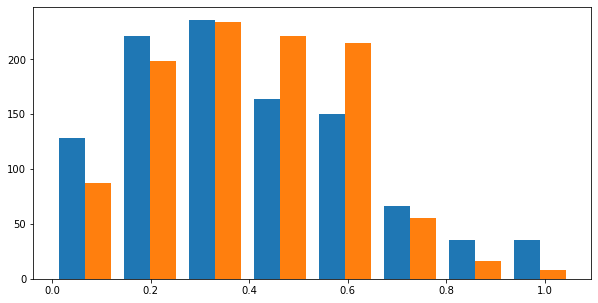

In [50]:
print("R2 : ",yScore)
print("\n")
tableB={}
tableB=testAndPredictedTable(ytest,yPredict)
print(tableB.head(25))
plt.figure(figsize=(10,5))
plt.hist(tableB,bins=8)
plt.show()